<a href="https://colab.research.google.com/github/chaehyeon1224/red4DL/blob/main/deep_learning_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM - 1
https://dschloe.github.io/python/python_edu/07_deeplearning/deep_learning_lstm/#2-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A0%84%EC%B2%98%EB%A6%AC-%EB%B0%8F-%EC%8B%9C%EA%B0%81%ED%99%94

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [3]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'MyDrive/딥러닝 data/train_files' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive/MyDrive/딥러닝 data/train_files


In [4]:
%cd "{PROJECT_PATH}"

/content/drive/MyDrive/딥러닝 data/train_files


In [5]:
from google.colab import files
myfile = files.upload()

Saving stock_prices.csv to stock_prices (1).csv


In [6]:
#io와 pandas 모듈 import
import io
import pandas as pd

In [7]:
#pd.read_csv로 csv파일 불러오기
stocks = pd.read_csv(io.BytesIO(myfile['stock_prices.csv']))
stocks.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211206_1301,2021-12-06,1301,2982.0,2982.0,2965.0,2971.0,8900,1.0,NaN,False,-0.003263
1,20211206_1332,2021-12-06,1332,592.0,599.0,588.0,589.0,1360800,1.0,NaN,False,-0.008993
2,20211206_1333,2021-12-06,1333,2368.0,2388.0,2360.0,2377.0,125900,1.0,NaN,False,-0.009963
3,20211206_1375,2021-12-06,1375,1230.0,1239.0,1224.0,1224.0,81100,1.0,NaN,False,-0.015032
4,20211206_1376,2021-12-06,1376,1339.0,1372.0,1339.0,1351.0,6200,1.0,NaN,False,0.002867


In [8]:
stocks['Date'] = pd.to_datetime(stocks['Date'], format='%Y-%m-%d')
# stocks['일자'] = pd.to_datetime(stocks['일자'], format='%Y-%m-%d')
stocks['연도'] = stocks['Date'].dt.year

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['Close'], x=df['Date'])
plt.xlabel('time')
plt.ylabel('close_price')

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['Open'], x=df['Date'])
plt.xlabel('time')
plt.ylabel('open_price')

Text(0, 0.5, 'high_price')

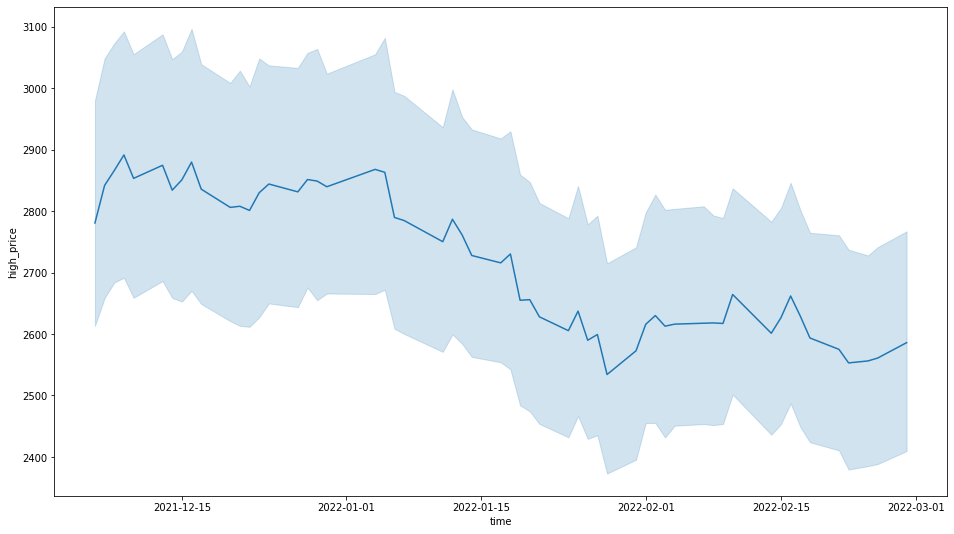

In [12]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['High'], x=df['Date'])
plt.xlabel('time')
plt.ylabel('high_price')

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['Low'], x=df['Date'])
plt.xlabel('time')
plt.ylabel('low_price')

Text(0, 0.5, 'price')

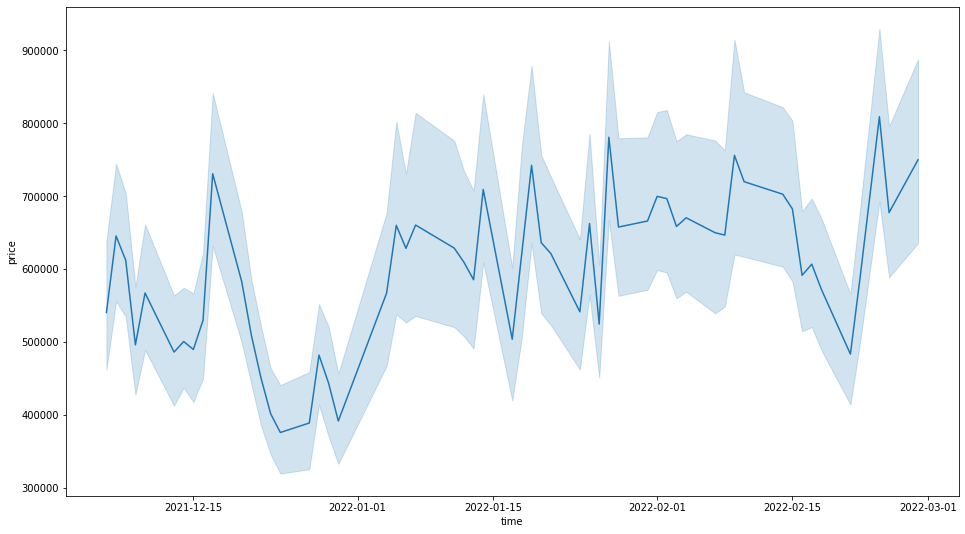

In [13]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['Volume'], x=df['Date'])
plt.xlabel('time')
plt.ylabel('price')

In [14]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,Open,High,Low,Close,Volume
0,0.037306,0.037190,0.037306,0.037156,0.000076
1,0.007051,0.007107,0.007051,0.007021,0.011559
2,0.029534,0.029692,0.029606,0.029641,0.001069
3,0.015128,0.015187,0.015147,0.015055,0.000689
4,0.016507,0.016866,0.016610,0.016661,0.000053
...,...,...,...,...,...
111995,0.006026,0.006085,0.006046,0.006098,0.001024
111996,0.009975,0.009960,0.009928,0.009969,0.000138
111997,0.019811,0.020022,0.019932,0.019811,0.000034
111998,0.032065,0.031964,0.031897,0.032019,0.000076


In [15]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [16]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [17]:
from sklearn.model_selection import train_test_split

feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((89424, 20, 5), (22356, 20, 5))

In [18]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 5), (200, 1))

In [19]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 5), (180, 1))

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [34]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'stock_prices.csv')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')


In [35]:
history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
5582/5589 [============================>.] - ETA: 0s - loss: nan
Epoch 1: val_loss did not improve from inf
5589/5589 [==============================] - 45s 8ms/step - loss: nan - val_loss: nan
Epoch 2/200
5588/5589 [============================>.] - ETA: 0s - loss: nan
Epoch 2: val_loss did not improve from inf
5589/5589 [==============================] - 44s 8ms/step - loss: nan - val_loss: nan
Epoch 3/200
5587/5589 [============================>.] - ETA: 0s - loss: nan
Epoch 3: val_loss did not improve from inf
5589/5589 [==============================] - 44s 8ms/step - loss: nan - val_loss: nan
Epoch 4/200
5589/5589 [==============================] - ETA: 0s - loss: nan
Epoch 4: val_loss did not improve from inf
5589/5589 [==============================] - 44s 8ms/step - loss: nan - val_loss: nan
Epoch 5/200
5584/5589 [============================>.] - ETA: 0s - loss: nan
Epoch 5: val_loss did not improve from inf
5589/5589 [==============================] - 44s 8ms/ste

In [39]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(180, 1)

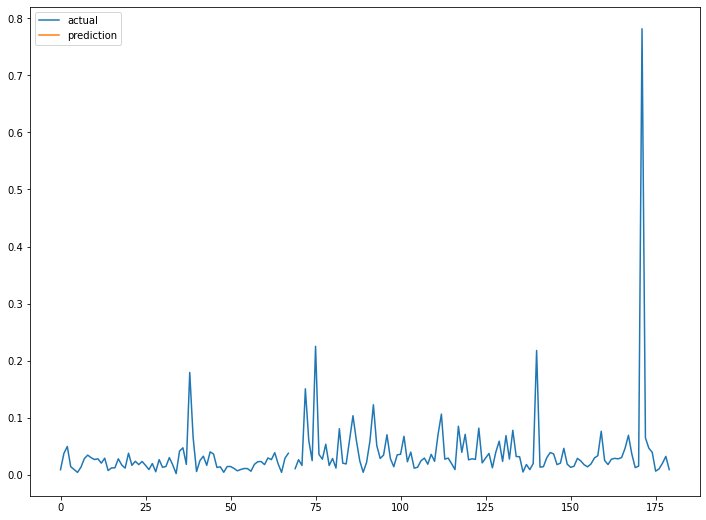

In [40]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

LSTM - 2 

https://data-analysis-expertise.tistory.com/67

In [ ]:
def ts_train_test(all_data, time_steps, for_periods):
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test = all_data['2019':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps, ts_train_len -1):
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i : i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adi Close"]['2019':]), axis=0).values
    inputs = inputs[len(inputs)-len(ts_test)-time_steps:]
    inputs = inputs.reshape(-1,1)

    X_test = []
    for i in range(time_steps, ts_test_len + time_steps - for_periods):
        X_test.append(inputs[i-time_steps:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

    return X_train, y_train, X_test



In [ ]:
X_train, y_train, X_test = ts_train_test(stocks,5,2)

X_train_see = pd.DataFrame(np.reshape(X_train, (X_train.shape[0], X_train.shape[1])))
y_train_see = pd.DataFrame(y_train)
pd.concat([X_train_see, y_train_see], axis = 1)

X_test_see = pd.DataFrame(np.reshape(X_test, (X_test.shape[0], X_test.shape[1])))
pd.DataFrame(X_test_see)

print("There are" + str(X_train.shpae[0]) + "samples in the training data")

print("There are" + str(X_test.shape[0]) + "samples in the test data")

TypeError: ignored

In [ ]:
def ts_train_test(all_data, time_steps, for_periods):
    ts_train = all_data[:'2018'].iloc[:,0:1].values
    ts_test = all_data['2019':].iloc[:,0:1].values
    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range=(0,1))
    ts_train_scaled = sc.fit_transform(ts_train)

    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps, ts_train_len -1):
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i : i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
    inputs = pd.concat((all_data["Adj Close"][:'2018'], all_data["Adi Close"]['2019':]), axis=0).values
    inputs = inputs[len(inputs)-len(ts_test)-time_steps:]
    inputs = inputs.reshape(-1,1)

    X_test = []
    for i in range(time_steps, ts_test_len + time_steps - for_periods):
        X_test.append(inputs[i-time_steps:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

    return X_train, y_train, X_test

In [ ]:
X_train, y_train, X_test, sc = ts_train_test_normalize(all_data,5,2)

In [ ]:
def LSTM_model(X_train, y_train, X_test, sc):
    from Keras.models import Sequential
    from Keras.layers import Dense, SimpleRNN, GPU, LSTM
    from Keras.optimizers import SGD

    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50,
                           return_sequences = True,
                           input_shape = (X_train.shape[1],1),
                           activation = 'tanh'))
    my_LSTM_model.add(LSTM(units = 50, activation = 'tanh'))
    my_LSTM_model.add(Dense(units=2))

    my_LSTM_model.fit(X_train, y_train, epochs = 50, batch_size = 150, verbose = 0)

    LSTM_prediction = my_LSTM_model.predict(X_test)

    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

In [ ]:
def actual_pred_plot(preds):
    actual_pred = pd.DataFrame(columns = ['Adj.Close', 'prediction'])
    actual_pred['Adi.Close'] = all_data.loc['2019':, 'Adi Close'][0:len(preds)]
    actual_pred['prediction'] = preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
        m.update_state(np.array(actual_pred['Adi.Close']), np.array(actial_pred['prediction']))

        return (m.result().numpy(), actual_pred.plot())

IndentationError: ignored

In [ ]:
my_LSTM_model, LSTM_ prediction = LSTM_model(X_train, y_trian, X_test, sc)

In [ ]:
y_pred = pd.DataFrame(LSTM_prediction[:,0])
y_test = all_data.loc['2019':, 'Adj Close'][0:len(LSTM_prediction)]
y_test.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def confirm_result(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MSLE = mean_squared_log_error(y_test, y_pred)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
    R2 = r2_score(t_test, y_pred)

    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data=[MAE,RMSE, RMSLE, R2],
                          index = ['MAE','RMSE', 'RMSLE', 'R2'],
                          columns = ['Results'])
    
    return Result

In [ ]:
confirm_result(y_test, y_pred)